In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score


In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


<Axes: xlabel='latitude', ylabel='longitude'>

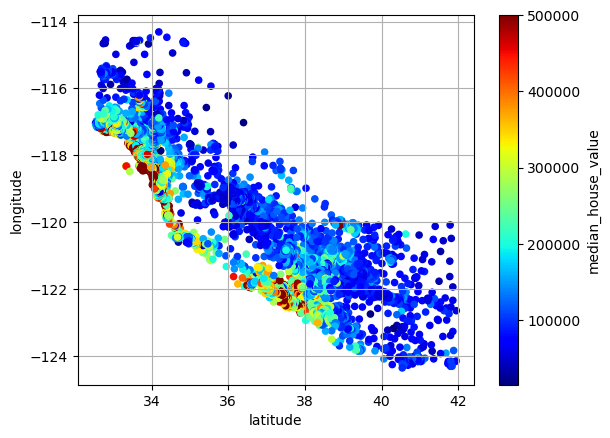

In [4]:

df.plot(kind = "scatter", x = "latitude", y = "longitude", grid = True,cmap = 'jet', c = 'median_house_value')

In [5]:
df.select_dtypes(include=['number']).corr()['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [6]:
''' From the above correlation values, we observe that median_income has the 
strongest positive correlation with median_house_value among all the explanatory 
features, indicating that it is the most influential predictor of house prices in this dataset'''

' From the above correlation values, we observe that median_income has the \nstrongest positive correlation with median_house_value among all the explanatory \nfeatures, indicating that it is the most influential predictor of house prices in this dataset'

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


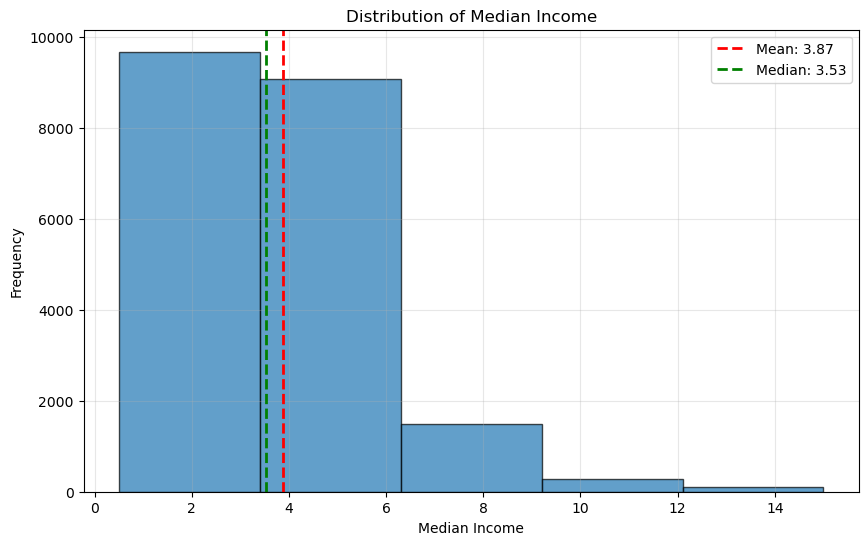

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['median_income'], bins = 5, edgecolor='black', alpha=0.7)
plt.axvline(df['median_income'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {df["median_income"].mean():.2f}')
plt.axvline(df['median_income'].median(), color='green', linestyle='--', 
            linewidth=2, label=f'Median: {df["median_income"].median():.2f}')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Distribution of Median Income')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [9]:
'''From the above figure, the median_income variable is divided into four income categories. 
Since median_income shows the strongest correlation with median_house_value, 
it is an important explanatory feature. Therefore, stratified sampling is used
based on income categories to ensure that each category is proportionally represented
in both the training and test datasets'''

'From the above figure, the median_income variable is divided into four income categories. \nSince median_income shows the strongest correlation with median_house_value, \nit is an important explanatory feature. Therefore, stratified sampling is used\nbased on income categories to ensure that each category is proportionally represented\nin both the training and test datasets'

In [10]:

#Adding the income_cat column into the data set for strafied sampling
df['income_cat'] = pd.cut(df['median_income'], bins = [0,1.5,3.0,4.5,6.0,np.inf] , labels = [1,2,3,4,5])

In [11]:
# Preparing train_set and test_test using stratified sampling

In [12]:
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [13]:
for sett in (strat_train_set, strat_test_set):
    sett.drop('income_cat', axis = 1, inplace = True)

In [14]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  int64  
 3   total_rooms         16512 non-null  int64  
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  int64  
 6   households          16512 non-null  int64  
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  int64  
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [15]:
housing = strat_train_set.drop('median_house_value', axis = 1).copy()
housing_value = strat_train_set['median_house_value']

In [16]:
housing = pd.get_dummies(housing, columns = ['ocean_proximity'], dtype = (int))

In [17]:
imputer = SimpleImputer(strategy='median')
housing_fillna = imputer.fit(housing)

In [18]:
housing_fillna = imputer.transform(housing)

In [19]:
housing_fillna = pd.DataFrame(data = housing_fillna, columns = housing.columns, index = housing.index)

In [20]:
housing_fillna.info()
#Data with no missing values

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16512 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   ocean_proximity_<1H OCEAN   16512 non-null  float64
 9   ocean_proximity_INLAND      16512 non-null  float64
 10  ocean_proximity_ISLAND      16512 non-null  float64
 11  ocean_proximity_NEAR BAY    16512 non-null  float64
 12  ocean_proximity_NEAR OCEAN  16512 non-null  float64
dtypes: float64(13)
memory usage: 1.8

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:

#scaled = scaler.fit_transform(housing_fillna)

In [23]:
housing_scaled = pd.DataFrame(data = scaler.fit_transform(housing_fillna)
                              , columns = housing_fillna.columns, index = housing_fillna.index)

In [24]:
#Preparing test set
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 5241 to 3965
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   int64  
 3   total_rooms         4128 non-null   int64  
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   int64  
 6   households          4128 non-null   int64  
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   int64  
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 354.8+ KB


In [25]:
housing_test = strat_test_set.drop('median_house_value', axis = 1).copy()
housing_test_value = strat_test_set['median_house_value']
housing_test = pd.get_dummies(housing_test, columns = ['ocean_proximity'], dtype = (int))
housing_test_fit = imputer.fit(housing_test)
housing_test_fit_tra = imputer.transform(housing_test)
housing_test_fit_tra_df = pd.DataFrame(housing_test_fit_tra, columns = housing_test.columns, index = housing_test.index) 
housing_test_scaled = pd.DataFrame(data = scaler.fit_transform(housing_test_fit_tra_df), columns = housing_test.columns, index = housing_test.index)
#housing_test_scaled

In [26]:
#train and testig sets are as follows:
#train = housing_sclaled
#test = housing_test_scaled

#Correspoding target columns are
#training = housing_value
#testing = housing_test_value

In [27]:
housing_scaled.index, housing_value.index

(Index([12655, 15502,  2908, 14053, 20496,  1481, 18125,  5830, 17989,  4861,
        ...
        12396, 16476,  2271,  6980,  5206, 15174, 12661, 19263, 19140, 19773],
       dtype='int64', length=16512),
 Index([12655, 15502,  2908, 14053, 20496,  1481, 18125,  5830, 17989,  4861,
        ...
        12396, 16476,  2271,  6980,  5206, 15174, 12661, 19263, 19140, 19773],
       dtype='int64', length=16512))

In [28]:
housing_test_scaled.index, housing_test_value.index

(Index([ 5241, 17352,  3505,  7777, 14155,  7057,    33, 17049, 18164, 10444,
        ...
         5353,  3208,  5568, 16838, 19769, 12182,  7275, 17223, 10786,  3965],
       dtype='int64', length=4128),
 Index([ 5241, 17352,  3505,  7777, 14155,  7057,    33, 17049, 18164, 10444,
        ...
         5353,  3208,  5568, 16838, 19769, 12182,  7275, 17223, 10786,  3965],
       dtype='int64', length=4128))

In [29]:
#Now we are ready to apply ml alghorithms

In [30]:
#Using LinearRegression

In [31]:
lr = LinearRegression()
lr.fit(housing_scaled,housing_value)

LinearRegression()

In [32]:
y_lrpred = lr.predict(housing_test_scaled)
y_lrpred 

array([420456.58844608, 293632.55263424, 247385.19150077, ...,
       310718.16706705, 269554.63128493, 242213.19219349])

In [33]:
#Using RandomForestRegressor

In [34]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf = RandomForestRegressor()
rf.fit(housing_scaled,housing_value)


RandomForestRegressor()

In [35]:
y_rfpred = rf.predict(housing_test_scaled)
y_rfpred 

array([477948.49, 207671.01, 216711.  , ..., 334953.07, 258778.01,
       225134.  ])

In [36]:
#Using GradientBoostingRegressor

In [37]:
gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
gbr =GradientBoostingRegressor()
gbr.fit(housing_scaled,housing_value)

GradientBoostingRegressor()

In [38]:
y_gbrpred = gbr.predict(housing_test_scaled)


In [39]:
housing_test_value.values


array([500001, 162500, 204600, ..., 293800, 335700, 215600])

In [40]:
#DecisionTreeRegressor

In [63]:
dt = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt.fit(housing_scaled,housing_value)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [64]:
y_dtpred = dt.predict(housing_test_scaled)


In [43]:
X_train_xgb = housing_scaled.copy()
X_test_xgb = housing_test_scaled.copy()

In [61]:
#X_train_xgb

In [62]:
#X_test_xgb

In [46]:
# Using xgboost
import re
X_train_xgb.columns = [re.sub(r'[\[\]<>]', '_', c) for c in X_train_xgb.columns]
X_test_xgb.columns  = [re.sub(r'[\[\]<>]', '_', c) for c in X_test_xgb.columns]



In [47]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train_xgb,housing_value)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [55]:
y_xgbpred = xgb.predict(X_test_xgb)

In [65]:
# metrics for linear regressor
r2_lr = r2_score(housing_test_value, y_lrpred)
mae_lr = mean_absolute_error(housing_test_value, y_lrpred)
rmse_lr = np.sqrt(mean_squared_error(housing_test_value,y_lrpred))


# metrics for RandomForest
r2_rf = r2_score(housing_test_value, y_rfpred)
mae_rf = mean_absolute_error(housing_test_value, y_rfpred)
rmse_rf = np.sqrt(mean_squared_error(housing_test_value,y_rfpred))


# metrics for GradientBoostingRegressor
r2_gbr = r2_score(housing_test_value, y_gbrpred)
mae_gbr = mean_absolute_error(housing_test_value, y_gbrpred)
rmse_gbr = np.sqrt(mean_squared_error(housing_test_value,y_gbrpred))


# metrics for DecisionTreeRegressor
r2_dt = r2_score(housing_test_value, y_dtpred)
mae_dt = mean_absolute_error(housing_test_value, y_dtpred)
rmse_dt = np.sqrt(mean_squared_error(housing_test_value,y_dtpred))

# metrics for XGB
r2_xgb = r2_score(housing_test_value, y_xgbpred)
mae_xgb = mean_absolute_error(housing_test_value, y_xgbpred)
rmse_xgb = np.sqrt(mean_squared_error(housing_test_value,y_xgbpred))

In [66]:
metrics_dict = {
    'Linear Regression': {
        'R2_Score': r2_lr,
        'MAE': f"{mae_lr:,.2f}",
        'RMSE': f"{rmse_lr:,.2f}",
    },
    'Random Forest': {
        'R2_Score': r2_rf,
        'MAE': f"{mae_rf:,.2f}",
        'RMSE': f"{rmse_rf:,.2f}",
    },
    'Gradient Boosting': {
        'R2_Score': r2_gbr,
        'MAE': f"{mae_gbr:,.2f}",
        'RMSE': f"{rmse_gbr:,.2f}",
    },
   'Decision_Tree': {
        'R2_Score': r2_dt,
        'MAE': f"{mae_dt:,.2f}",
        'RMSE': f"{rmse_gbr:,.2f}",
    },
   'XGB': {
        'R2_Score': r2_xgb,
        'MAE': f"{mae_xgb:,.2f}",
        'RMSE': f"{rmse_xgb:,.2f}",
    }
}

In [67]:
Result_df = pd.DataFrame(metrics_dict).T
Result_df

,R2_Score,MAE,RMSE
Linear Regression,0.651175,"49,781.22","67,426.14"
Random Forest,0.778363,"37,201.49","53,745.93"
Gradient Boosting,0.763781,"39,979.11","55,485.85"
Decision_Tree,0.684833,"44,495.22","55,485.85"
XGB,0.820015,"33,274.09","48,433.16"


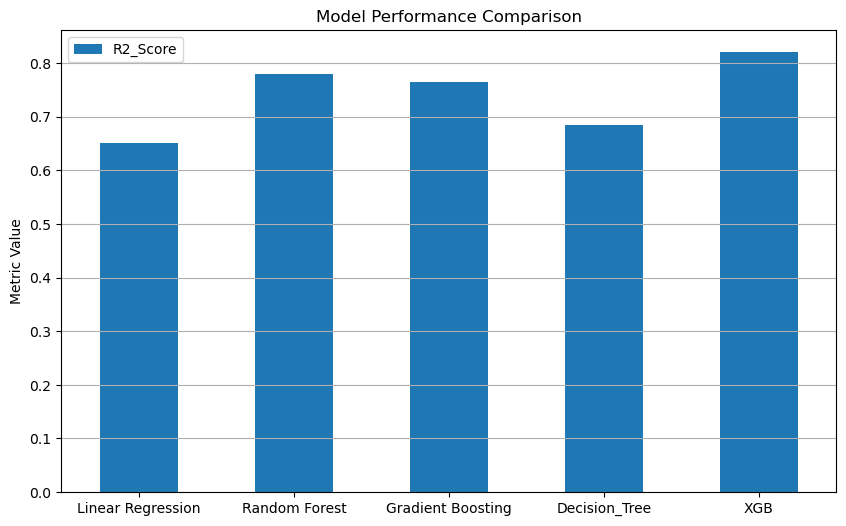

In [68]:
Result_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)

plt.grid(axis = 'y')
plt.show()

In [70]:
#XGB performes good with R2 score = 0.82

In [71]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29,6447,1012.0,2184,960,8.2816,500001,<1H OCEAN
17352,-120.42,34.89,24,2020,307.0,855,283,5.0099,162500,<1H OCEAN
3505,-118.45,34.25,36,1453,270.0,808,275,4.3839,204600,<1H OCEAN
7777,-118.10,33.91,35,1653,325.0,1072,301,3.2708,159700,<1H OCEAN
14155,-117.07,32.77,38,3779,614.0,1495,614,4.3529,184000,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19,2248,427.0,1207,368,2.8170,110000,<1H OCEAN
7275,-118.24,33.99,33,885,294.0,1270,282,2.1615,118800,<1H OCEAN
17223,-119.72,34.44,43,1781,342.0,663,358,4.7000,293800,<1H OCEAN
10786,-117.91,33.63,30,2071,412.0,1081,412,4.9125,335700,<1H OCEAN


In [80]:
data = {'Linear' : y_lrpred, 'RandomForest' : y_rfpred, 'GBR' :
       y_gbrpred, 'DecisionTree' :y_dtpred, 'XGB': y_xgbpred}

In [91]:
results = pd.DataFrame(data = data,index = strat_test_set.index)

In [92]:
results.dtypes

Linear          float64
RandomForest    float64
GBR             float64
DecisionTree    float64
XGB             float32
dtype: object

In [95]:
results['XGB'] = results['XGB'].astype(float)

In [96]:
Final_results = results.round(2)

In [97]:
Final_results

,Linear,RandomForest,GBR,DecisionTree,XGB
5241,420456.59,477948.49,505182.63,482488.25,502808.00
17352,293632.55,207671.01,238589.33,255593.96,207752.30
3505,247385.19,216711.00,231877.96,226591.39,200767.91
7777,196964.78,223106.00,170735.49,217782.32,170018.72
14155,264855.10,196141.00,204713.04,176381.48,194300.39
...,...,...,...,...,...
12182,149196.59,158342.00,162245.57,148995.65,154029.69
7275,145565.79,128981.00,137274.94,114761.98,107007.90
17223,310718.17,334953.07,320203.37,363554.97,349919.62
10786,269554.63,258778.01,240837.72,250676.00,265038.38


In [99]:
Original_vs_predicted = pd.concat([strat_test_set, Final_results], axis = 1)

In [100]:
Original_vs_predicted.to_csv('Original_vs_predicted.csv')